#### Grid Search

In [1]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Cargamos el dataset de iris como ejemplo
data = load_iris()
X = data.data
y = data.target

# Definimos el modelo y el grid de hiperparámetros
clf = RandomForestClassifier()
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [5, 10, 15]
}

# Aplicamos GridSearchCV con cv=3
search = GridSearchCV(clf, param_grid, cv=3, verbose = 1)
search.fit(X, y)

# Mostramos los mejores hiperparámetros encontrados
print(search.best_params_)
print(search.best_score_)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
{'max_depth': 5, 'n_estimators': 100}
0.9666666666666667


In [2]:
import pandas as pd
pd.DataFrame(search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.013296,0.001242,0.000998,1.030086e-06,5,10,"{'max_depth': 5, 'n_estimators': 10}",0.98,0.92,0.96,0.953333,0.024944,5
1,0.070478,0.007824,0.004321,4.697969e-04,5,50,"{'max_depth': 5, 'n_estimators': 50}",0.98,0.94,0.96,0.960000,0.016330,2
2,0.142619,0.007237,0.009641,3.083055e-03,5,100,"{'max_depth': 5, 'n_estimators': 100}",0.98,0.94,0.98,0.966667,0.018856,1
3,0.012301,0.000471,0.001994,1.123916e-07,10,10,"{'max_depth': 10, 'n_estimators': 10}",0.98,0.92,0.96,0.953333,0.024944,5
4,0.066822,0.006148,0.004654,9.401557e-04,10,50,"{'max_depth': 10, 'n_estimators': 50}",0.98,0.94,0.96,0.960000,0.016330,2
5,0.139627,0.005683,0.007978,1.409503e-03,10,100,"{'max_depth': 10, 'n_estimators': 100}",0.98,0.94,0.96,0.960000,0.016330,2
6,0.014296,0.001881,0.001662,4.698533e-04,15,10,"{'max_depth': 15, 'n_estimators': 10}",0.98,0.92,0.94,0.946667,0.024944,9
7,0.067154,0.006632,0.004986,1.411526e-03,15,50,"{'max_depth': 15, 'n_estimators': 50}",0.98,0.94,0.94,0.953333,0.018856,5
8,0.137300,0.011398,0.007314,4.699655e-04,15,100,"{'max_depth': 15, 'n_estimators': 100}",0.98,0.94,0.94,0.953333,0.018856,5


#### Random Search

In [3]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Cargamos el dataset de iris
data = load_iris()
X = data.data
y = data.target

# Definimos el modelo
clf = RandomForestClassifier()

# Definimos el espacio de hiperparámetros
random_space = {
    'n_estimators': randint(10, 100),
    'max_depth': randint(5, 15)
}

# Aplicamos RandomizedSearchCV con cv=3 y 5 iteraciones
search = RandomizedSearchCV(clf, random_space, n_iter=10, cv=3, random_state=42)
search.fit(X, y)

# Mostramos los mejores hiperparámetros encontrados
print("Mejores hiperparámetros:", search.best_params_)
print("Mejor precisión:", search.best_score_)


Mejores hiperparámetros: {'max_depth': 12, 'n_estimators': 70}
Mejor precisión: 0.9666666666666667


In [4]:
pd.DataFrame(search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.095076,0.015926,0.006649,1.243858e-03,11,61,"{'max_depth': 11, 'n_estimators': 61}",0.98,0.94,0.96,0.960000,0.016330,4
1,0.098960,0.006015,0.006864,1.499617e-03,12,70,"{'max_depth': 12, 'n_estimators': 70}",0.98,0.94,0.98,0.966667,0.018856,1
2,0.121674,0.002820,0.010306,2.487567e-03,9,92,"{'max_depth': 9, 'n_estimators': 92}",0.98,0.94,0.96,0.960000,0.016330,4
3,0.116355,0.015796,0.006316,4.706960e-04,11,84,"{'max_depth': 11, 'n_estimators': 84}",0.98,0.94,0.98,0.966667,0.018856,1
4,0.043767,0.004150,0.002992,7.370010e-07,12,33,"{'max_depth': 12, 'n_estimators': 33}",0.98,0.94,0.96,0.960000,0.016330,4
5,0.039098,0.002694,0.003324,4.705291e-04,7,31,"{'max_depth': 7, 'n_estimators': 31}",0.98,0.94,0.96,0.960000,0.016330,4
6,0.013298,0.000471,0.001994,6.743496e-07,9,11,"{'max_depth': 9, 'n_estimators': 11}",0.98,0.94,0.98,0.966667,0.018856,1
7,0.058521,0.004907,0.004311,1.255261e-03,12,39,"{'max_depth': 12, 'n_estimators': 39}",0.98,0.94,0.96,0.960000,0.016330,4
8,0.015625,0.001695,0.001662,9.403243e-04,10,11,"{'max_depth': 10, 'n_estimators': 11}",0.98,0.92,0.96,0.953333,0.024944,10
9,0.065824,0.004954,0.004322,1.880705e-03,9,42,"{'max_depth': 9, 'n_estimators': 42}",0.98,0.94,0.96,0.960000,0.016330,4


### Optimizacion bayesiana

In [5]:
!pip install scikit-optimize

In [6]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from skopt import BayesSearchCV
from skopt.space import Integer

# Cargamos el dataset de iris
data = load_iris()
X = data.data
y = data.target

# Definimos el modelo
clf = RandomForestClassifier()

# Definimos el espacio de hiperparámetros usando la sintaxis de skopt
bayes_space = {
    'n_estimators': Integer(10, 100),  # Busca entre 10 y 100
    'max_depth': Integer(5, 15)        # Busca entre 5 y 15
}

# Aplicamos BayesSearchCV
search = BayesSearchCV(clf, bayes_space, n_iter=10, cv=3, random_state=42)
search.fit(X, y)

# Mostramos los mejores hiperparámetros encontrados
print("Mejores hiperparámetros:", search.best_params_)
print("Mejor precisión:", search.best_score_)


Mejores hiperparámetros: OrderedDict([('max_depth', 13), ('n_estimators', 25)])
Mejor precisión: 0.9666666666666667


In [7]:
search.cv_results_

{'mean_fit_time': array([0.10482502, 0.11668722, 0.11711923, 0.03291233, 0.05817652,
        0.11834884, 0.11017497, 0.12034488, 0.09507887, 0.12001204]),
 'std_fit_time': array([0.00488863, 0.00533928, 0.00298511, 0.0014081 , 0.00169576,
        0.00954249, 0.008721  , 0.00463007, 0.00692745, 0.00790997]),
 'mean_score_time': array([0.00631658, 0.00864395, 0.00664783, 0.00265908, 0.00432253,
        0.006658  , 0.00598351, 0.00731373, 0.0053188 , 0.00631618]),
 'std_score_time': array([0.00046907, 0.00124486, 0.00046968, 0.00046985, 0.0004707 ,
        0.00047683, 0.00141029, 0.00094021, 0.00047008, 0.00124401]),
 'param_max_depth': masked_array(data=[9, 13, 9, 13, 13, 12, 11, 10, 15, 5],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'param_n_estimators': masked_array(data=[75, 89, 93, 25, 49, 95, 80, 93, 73, 84],
              mask=[False, False, False, False, False, 

In [8]:
pd.DataFrame(search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.104825,0.004889,0.006317,0.000469,9,75,"{'max_depth': 9, 'n_estimators': 75}",0.98,0.94,0.94,0.953333,0.018856,9
1,0.116687,0.005339,0.008644,0.001245,13,89,"{'max_depth': 13, 'n_estimators': 89}",0.98,0.94,0.96,0.960000,0.016330,5
2,0.117119,0.002985,0.006648,0.000470,9,93,"{'max_depth': 9, 'n_estimators': 93}",0.98,0.94,0.92,0.946667,0.024944,10
3,0.032912,0.001408,0.002659,0.000470,13,25,"{'max_depth': 13, 'n_estimators': 25}",0.98,0.94,0.98,0.966667,0.018856,1
4,0.058177,0.001696,0.004323,0.000471,13,49,"{'max_depth': 13, 'n_estimators': 49}",0.98,0.94,0.98,0.966667,0.018856,1
5,0.118349,0.009542,0.006658,0.000477,12,95,"{'max_depth': 12, 'n_estimators': 95}",0.98,0.94,0.96,0.960000,0.016330,5
6,0.110175,0.008721,0.005984,0.001410,11,80,"{'max_depth': 11, 'n_estimators': 80}",0.98,0.94,0.98,0.966667,0.018856,1
7,0.120345,0.004630,0.007314,0.000940,10,93,"{'max_depth': 10, 'n_estimators': 93}",0.98,0.94,0.96,0.960000,0.016330,5
8,0.095079,0.006927,0.005319,0.000470,15,73,"{'max_depth': 15, 'n_estimators': 73}",0.98,0.94,0.96,0.960000,0.016330,5
9,0.120012,0.007910,0.006316,0.001244,5,84,"{'max_depth': 5, 'n_estimators': 84}",0.98,0.94,0.98,0.966667,0.018856,1


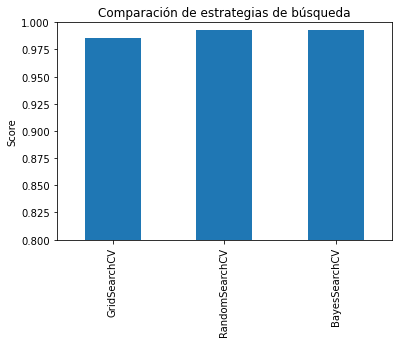

                   Score                                  Params
GridSearchCV    0.985816  {'max_depth': 15, 'n_estimators': 100}
RandomSearchCV  0.992908   {'max_depth': 12, 'n_estimators': 30}
BayesSearchCV   0.992908    {'max_depth': 7, 'n_estimators': 16}


In [9]:
from sklearn.datasets import load_iris, load_wine
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from skopt import BayesSearchCV
from skopt.space import Integer
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import randint

# 1. Preparación
data = load_wine()
X = data.data
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

param_space = {
    'n_estimators': [10, 25,50,75, 100],
    'max_depth': [5, 10, 15,20]
}

random_space = {
    'n_estimators': randint(10, 100),
    'max_depth': randint(5, 15)
}

bayes_space = {
    'n_estimators': Integer(10, 100),
    'max_depth': Integer(5, 20)
}

def run_search(search_method, X_train, y_train):
    search_method.fit(X_train, y_train)
    return search_method.best_score_, search_method.best_params_

# 2. Ejecución
results = {}

grid_search = GridSearchCV(RandomForestClassifier(), param_space, cv=3,scoring='accuracy')
results['GridSearchCV'] = run_search(grid_search, X_train, y_train)

random_search = RandomizedSearchCV(RandomForestClassifier(), random_space, n_iter=5, cv=3, scoring='accuracy')
results['RandomSearchCV'] = run_search(random_search, X_train, y_train)

bayes_search = BayesSearchCV(RandomForestClassifier(), bayes_space, n_iter=10, cv=3,scoring='accuracy')
results['BayesSearchCV'] = run_search(bayes_search, X_train, y_train)

# 3. Registro
df = pd.DataFrame.from_dict(results, orient='index', columns=['Score', 'Params'])

# 4. Visualización
df['Score'].plot(kind='bar', ylim=(0.8, 1.0))
plt.title('Comparación de estrategias de búsqueda')
plt.ylabel('Score')
plt.show()

print(df)


### mas hiperparametros

In [10]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from skopt import BayesSearchCV
from skopt.space import Integer, Real, Categorical, uniform
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import randint

data = load_wine()
X = data.data
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

param_space = {
    'n_estimators': [10, 50, 100],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'ccp_alpha': [0.0, 0.01, 0.1]
}

random_space = {
    'n_estimators': randint(10, 100),
    'max_depth': randint(5, 15),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 4),
    'ccp_alpha': uniform(0.0, 0.1)
}

bayes_space = {
    'n_estimators': Integer(10, 100),
    'max_depth': Integer(5, 15),
    'min_samples_split': Integer(2, 10),
    'min_samples_leaf': Integer(1, 4),
    'ccp_alpha': Real(0.0, 0.1)
}

def run_search(search_method, X_train, y_train):
    search_method.fit(X_train, y_train)
    return search_method.best_score_, search_method.best_params_


In [11]:
results = {}

grid_search = GridSearchCV(RandomForestClassifier(), param_space, cv=3, scoring='accuracy')
results['GridSearchCV'] = run_search(grid_search, X_train, y_train)

random_search = RandomizedSearchCV(RandomForestClassifier(), random_space, n_iter=10, cv=3, random_state=42, scoring='accuracy')
results['RandomSearchCV'] = run_search(random_search, X_train, y_train)

bayes_search = BayesSearchCV(RandomForestClassifier(), bayes_space, n_iter=10, cv=3, random_state=42, scoring='accuracy')
results['BayesSearchCV'] = run_search(bayes_search, X_train, y_train)


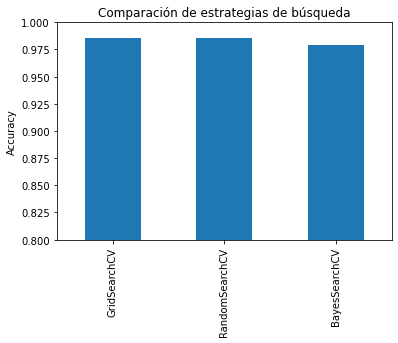

                   Score                                             Params
GridSearchCV    0.985816  {'ccp_alpha': 0.01, 'max_depth': 10, 'min_samp...
RandomSearchCV  0.985816  {'ccp_alpha': 0.06508884729488529, 'max_depth'...
BayesSearchCV   0.978723  {'ccp_alpha': 0.08373883555532845, 'max_depth'...


In [12]:
df = pd.DataFrame.from_dict(results, orient='index', columns=['Score', 'Params'])
df['Score'].plot(kind='bar', ylim=(0.8, 1.0))
plt.title('Comparación de estrategias de búsqueda')
plt.ylabel('Accuracy')
plt.show()

print(df)


In [13]:
results

{'GridSearchCV': (0.9858156028368795,
  {'ccp_alpha': 0.01,
   'max_depth': 10,
   'min_samples_leaf': 2,
   'min_samples_split': 5,
   'n_estimators': 10}),
 'RandomSearchCV': (0.9858156028368793,
  {'ccp_alpha': 0.06508884729488529,
   'max_depth': 9,
   'min_samples_leaf': 2,
   'min_samples_split': 9,
   'n_estimators': 39}),
 'BayesSearchCV': (0.9787234042553191,
  OrderedDict([('ccp_alpha', 0.08373883555532845),
               ('max_depth', 14),
               ('min_samples_leaf', 2),
               ('min_samples_split', 10),
               ('n_estimators', 88)]))}

In [14]:
pd.DataFrame(results)

,GridSearchCV,RandomSearchCV,BayesSearchCV
0,0.985816,0.985816,0.978723
1,"{'ccp_alpha': 0.01, 'max_depth': 10, 'min_samp...","{'ccp_alpha': 0.06508884729488529, 'max_depth'...","{'ccp_alpha': 0.08373883555532845, 'max_depth'..."


In [15]:
 ##  ojo que estos valores optimos de HP entran despues despues como **kwargs